In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3,suppress=True)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#zestaw danych Auto MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

raw_dataset = pd.read_csv(url,names=column_names, na_values='?', comment='\t', sep=' ',
                          skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
#szybkie czyszczenie danych
dataset.isna().sum()

In [6]:
#dataset = dataset.dropna

In [7]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')


dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [8]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

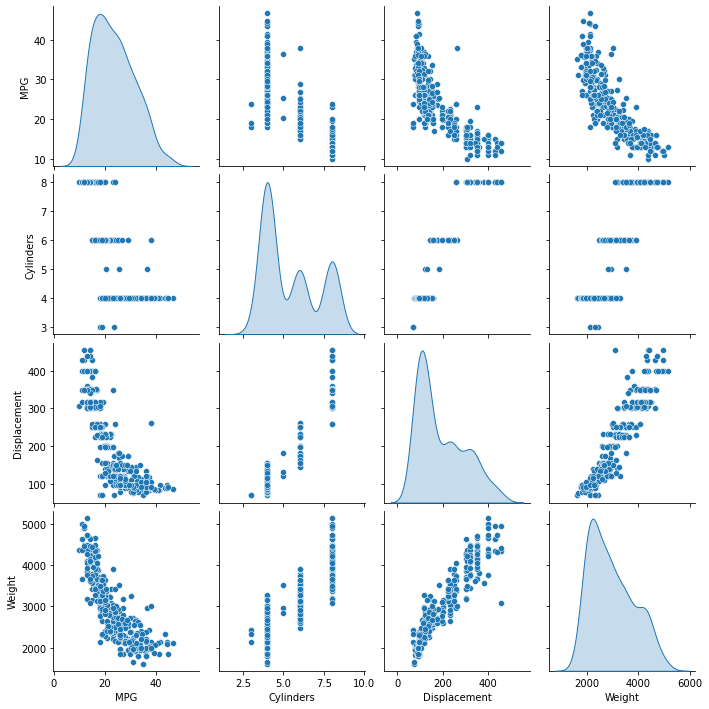

In [9]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')

In [10]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
Cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.000,92.00,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0
Europe,318.0,0.163522,0.370424,0.0,0.000,0.00,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.000,0.00,0.00,1.0
USA,318.0,0.641509,0.480313,0.0,0.000,1.00,1.00,1.0


In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
testlabels = test_features.pop('MPG')

In [12]:
#normalizacja
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.590566,7.913617
Cylinders,5.427673,1.682941
Displacement,193.061321,103.812742
Horsepower,104.067093,38.674662
Weight,2963.823899,844.749805
Acceleration,15.595912,2.796282
Model Year,75.946541,3.705266
Europe,0.163522,0.370424
Japan,0.194969,0.396801
USA,0.641509,0.480313


In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[   5.428  193.061      nan 2963.824   15.596   75.947    0.164    0.195
     0.642]]


In [14]:
first = np.array(train_features[:1])

with np.printoptions(precision=2,suppress = True):
    print(f"Pierwszy przypadek: {first}")
    print()
    print(f'Znormalizowany: {normalizer(first).numpy()}')

Pierwszy przypadek: [[   8.  351.  153. 4129.   13.   72.    0.    0.    1.]]

Znormalizowany: [[ 1.53  1.52   nan  1.38 -0.93 -1.07 -0.44 -0.49  0.75]]


Regrsja z jedną zmienną

In [16]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.preprocessing.normalization.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower_normalizer)

ValueError: ValueError: Failed to find data adapter that can handle input: <class 'keras.layers.preprocessing.normalization.Normalization'>, <class 'NoneType'>